<a href="https://colab.research.google.com/github/Yasna79/Challenge-1-Alura-Stores/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [38]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [39]:
from matplotlib import pyplot as plt

# Agregamos un id para las tiendas
tienda['id'] = 'Tienda 1'
tienda2['id'] = 'Tienda 2'
tienda3['id'] = 'Tienda 3'
tienda4['id'] = 'Tienda 4'

# Unimos todas las tiendas en un solo dataframe
all_stores = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Agrupamos por id (tienda) y las sumamos
facturacion_tiendas = all_stores.groupby('id')['Precio'].sum().reset_index()

facturacion_tiendas.head()


,id,Precio
0,Tienda 1,1.150880e+09
1,Tienda 2,1.116344e+09
2,Tienda 3,1.098020e+09
3,Tienda 4,1.038376e+09


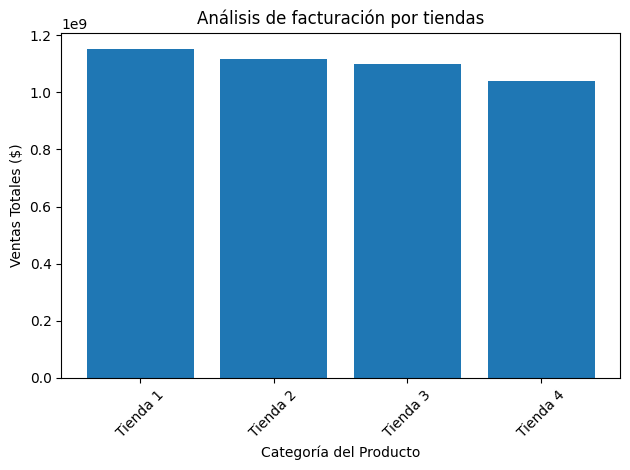

In [40]:

plt.bar(x=facturacion_tiendas['id'], height=facturacion_tiendas['Precio'])
plt.xlabel('Categoría del Producto')
plt.ylabel('Ventas Totales ($)')
plt.title('Análisis de facturación por tiendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [41]:
# Agrupsmos por tienda, categoria y contamos producto lo ordanamos por tienda y categoria producro en order descendiente para recuperar los mayores por tiendas
ventas_categoria = (
    all_stores
    .groupby(['id', 'Categoría del Producto'])['Precio']
    .count()
    .reset_index()
    .sort_values(by=['id', 'Categoría del Producto'], ascending=False,)
)

# Recuperamos el primer record de cada tienda, de esa forma nos quedamos con el mayor de cada uno
productos_mayores = ventas_categoria.groupby('id').head(1).reset_index(drop=True).sort_values(by='id')

productos_mayores.head()


,id,Categoría del Producto,Precio
3,Tienda 1,Muebles,465
2,Tienda 2,Muebles,442
1,Tienda 3,Muebles,499
0,Tienda 4,Muebles,480


# 3. Calificación promedio de la tienda


In [42]:
calificacion_tienda = (
    all_stores
    .groupby('id')['Calificación']
    .mean()
    .reset_index()
)

calificacion_tienda.head()



,id,Calificación
0,Tienda 1,3.976685
1,Tienda 2,4.037304
2,Tienda 3,4.048326
3,Tienda 4,3.995759


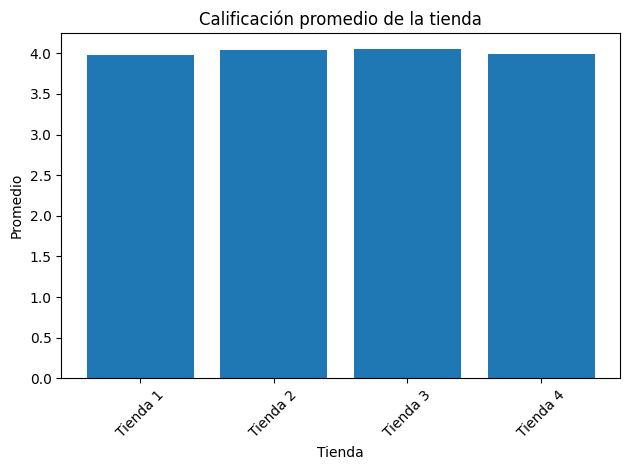

In [43]:
# print(calificacion_tienda.columns)

plt.bar(x=calificacion_tienda['id'], height=calificacion_tienda['Calificación'])
plt.xlabel('Tienda')
plt.ylabel('Promedio')
plt.title('Calificación promedio de la tienda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendido

In [44]:
producto_menos_mas_vendidos = (
    all_stores
    .groupby(['id','Producto'])['Precio']
    .agg(['count'])
    .reset_index()
)

prd_mion_max = (
    producto_menos_mas_vendidos
    .groupby('Producto')['count']
    .agg(['min', 'max'])
    .reset_index()
)

prd_mion_max.head()

,Producto,min,max
0,Ajedrez de madera,39,49
1,Armario,34,60
2,Asistente virtual,38,50
3,Auriculares,37,50
4,Auriculares con micrófono,33,44
